In [1]:
import FlowCal
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

In [2]:
s = FlowCal.io.FCSData("sample001.fcs")
s = FlowCal.transform.to_rfi(s)
s.shape, s.dtype

((33024, 8), dtype('float64'))

## `FlowCal.plot.hist1d`
- _Logicel_ scale (i.e. `xscale="logicel"`): visualize high fluorescence values with logarithmic spacing, and low fluorescence values with a more linear spacing
    - Other options for `xscale` are `"linear"` and `"log"`
- By default, `bins=256`, i.e. 256 uniformly spaced bins

In [3]:
# FlowCal.plot.hist1d?

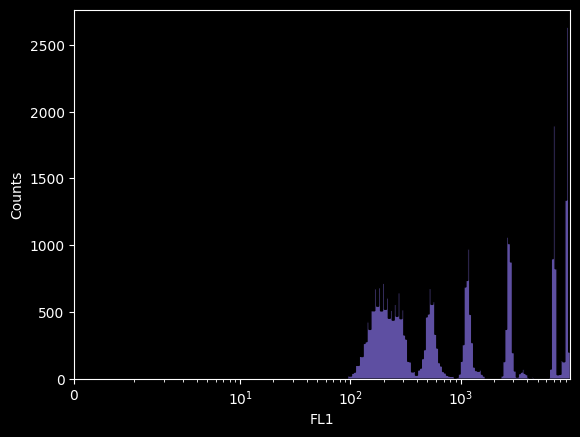

In [4]:
FlowCal.plot.hist1d(s, channel="FL1")

Let’s try using 1024 logarithmically-spaced bins.

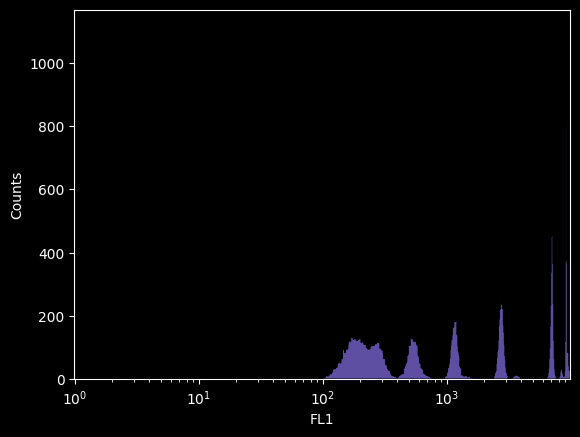

In [5]:
FlowCal.plot.hist1d(s, channel="FL1", xscale="log", bins=1024)

**(?)** How to plot two such plots in the same figure (like `plt.subplot`)?  

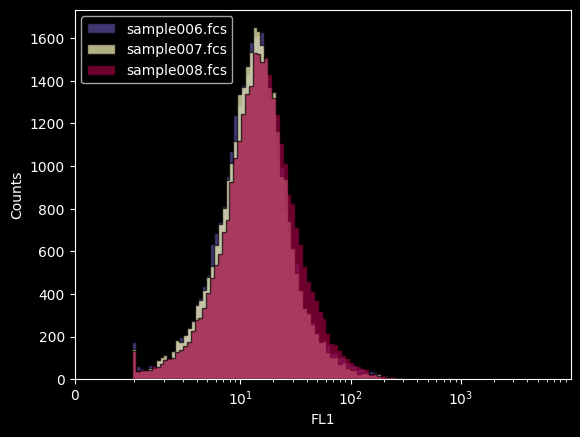

In [6]:
filenames = [f'sample{i:03d}.fcs' for i in range(6,9)]
d = [FlowCal.io.FCSData(f) for f in filenames]
d = [FlowCal.transform.to_rfi(s) for s in d]
FlowCal.plot.hist1d(d, channel="FL1", alpha=0.7, bins=128)
plt.legend(filenames, loc="upper left");

## Density Plots

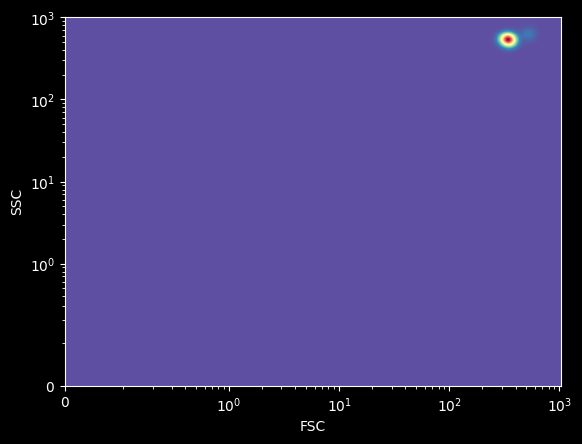

In [7]:
FlowCal.plot.density2d(s, channels=["FSC", "SSC"])

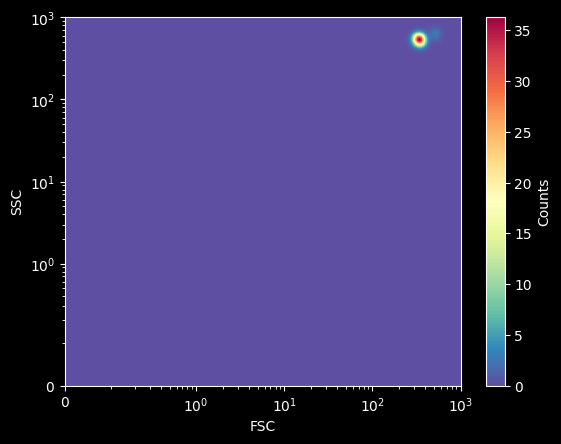

In [8]:
FlowCal.plot.density2d(s, channels=["FSC", "SSC"], colorbar=True)

`mode`
- `"mesh"`
- `"scatter"`

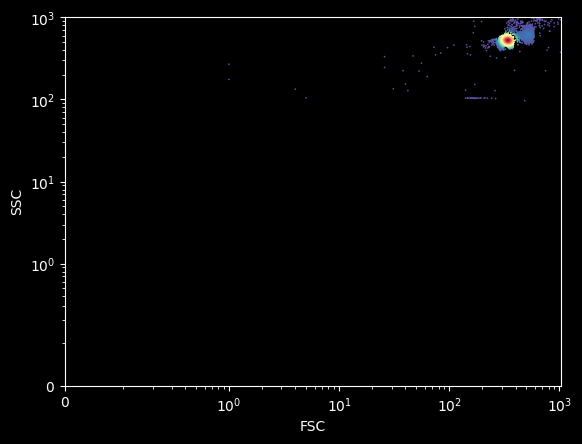

In [9]:
FlowCal.plot.density2d(s, channels=["FSC", "SSC"], mode="scatter")

## Combined Histogram and Density Plots

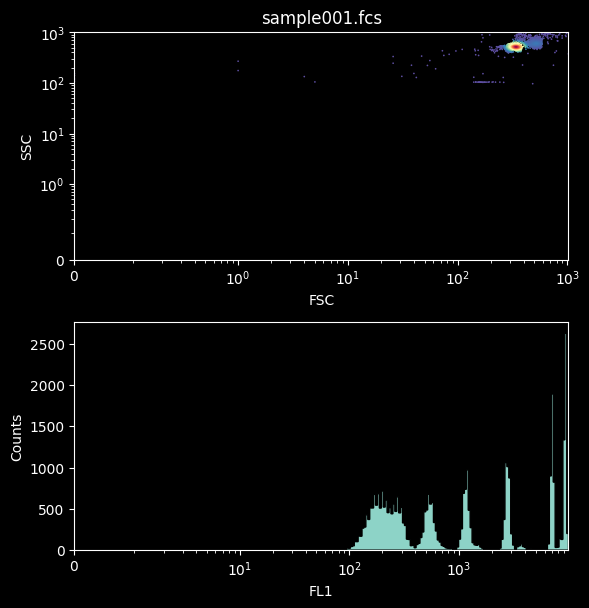

In [10]:
FlowCal.plot.density_and_hist(
    s,
    density_channels=["FSC", "SSC"],
    density_params={"mode": "scatter"},
    hist_channels=["FL1"],
)
plt.tight_layout()

What if we put more than one channel in `hist_channels`?

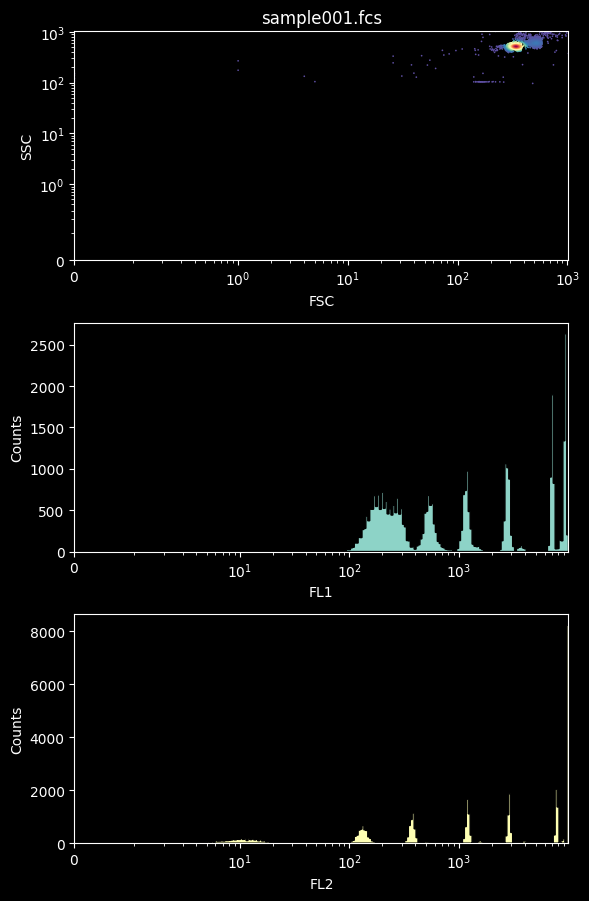

In [11]:
FlowCal.plot.density_and_hist(
    s,
    density_channels=["FSC", "SSC"],
    density_params={"mode": "scatter"},
    hist_channels=["FL1", "FL2"],
)
plt.tight_layout()